In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json

In [137]:

file_names = [
    "DT_BASE.txt",
    "DT_no_w.txt",
]

In [138]:
def read_txt(file_name):
    path = r"../results/v3/"
    
    with open(path + file_name, "r") as file:
        x = file.read()
        x = x.replace("\\n", "").replace("\\", "").replace("\n", "")
        y = re.split("[AFR]\w+:", x)[1:]
        y[2] = y[2].replace(r'}}"', "}}")

        acc = json.loads(y[0])
        f1 = json.loads(y[1])
        roc = json.loads(y[2])
    
    return acc, f1, roc


In [139]:
def combine_dicts(dict1, dict2):
    companies = ["amzn", "aapl", "msft", "tsla", "goog", "googl"]
    lag = ["1", "2", "3", "8"]*len(companies)

    new_dict = {}
    for company in companies:
        new_dict[company] = {}
        for lag in ["1", "2", "3", "8"]:
            new_dict[company][lag] = (dict1[company][lag], dict2[company][lag])

    return new_dict

In [140]:
def plot_company_comparison(company):
    title = "SVM"
    model_name = "SVM"

    dt_acc, dt_f1, dt_roc = read_txt(f"{model_name}_base.txt")
    dt2_acc, dt2_f1, dt2_roc = read_txt(f"{model_name}_all.txt")
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(5)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, dt_acc[company].values(), bar_width,
    alpha=opacity,
    color='b',
    label='baseline')

    rects2 = plt.bar(index + bar_width, dt2_acc[company].values(), bar_width,
    alpha=opacity,
    color='g',
    label='sentiment')

    plt.xlabel('Lag')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - {str(company).upper()}')
    plt.xticks(index + bar_width/2, ('1', '2', '3', '6', '8'))
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

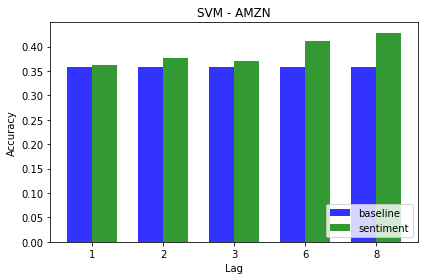

In [141]:
plot_company_comparison("amzn")

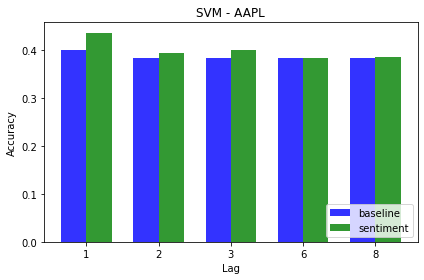

In [142]:
plot_company_comparison("aapl")

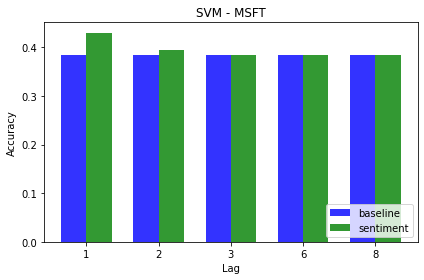

In [143]:
plot_company_comparison("msft")

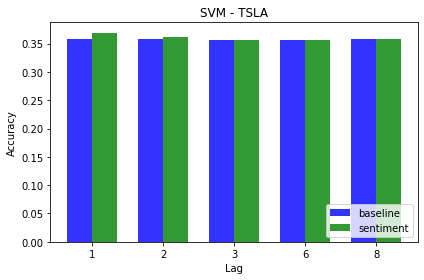

In [144]:
plot_company_comparison("tsla")

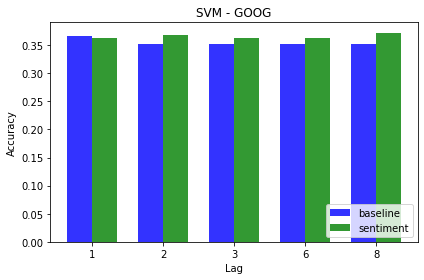

In [145]:
plot_company_comparison("goog")

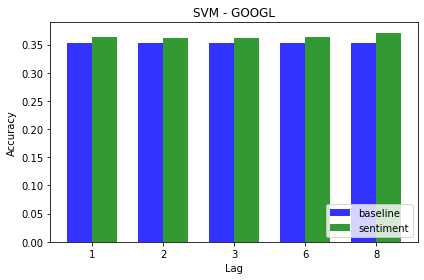

In [146]:
plot_company_comparison("googl")